### 네이버 데이터랩에서 검색어 트렌드 분석
* 검색어 트렌드 분석을 통한 검색어 증가에 따른 주가 영향 분석
* 마케팅 효과에 따른 검색어 증가량 분석
* 마케팅 수명관리
* 경쟁사 마케팅 파급효과 분석

### reference
* 네이버 디벨로퍼 가입
* 어플리케이션 등록
* https://developers.naver.com/docs/datalab/search/#python

In [2]:
import os
import sys
import urllib.request
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname = fm.FontProperties(fname='malgun.ttf').get_name()
import sqlite3
from IPython.display import Image
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

In [3]:
client_id = nid
client_secret = nkey

url = "https://openapi.naver.com/v1/datalab/search";

body = """{
    "startDate":"2019-01-01",
    "endDate":"2020-08-30",
    "timeUnit":"date",
    "keywordGroups":[
          {"groupName":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"]},
          {"groupName":"반도","keywords":["반도","CJ ENM"]}
    ]
    }"""

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    res=response_body.decode('utf-8')
    print(res)
else:
    print("Error Code:" + rescode)

{"startDate":"2019-01-01","endDate":"2020-08-30","timeUnit":"date","results":[{"title":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"],"data":[{"period":"2019-01-01","ratio":0.04043},{"period":"2019-01-02","ratio":0.06549},{"period":"2019-01-03","ratio":0.06908},{"period":"2019-01-04","ratio":0.06178},{"period":"2019-01-05","ratio":0.05961},{"period":"2019-01-06","ratio":0.06042},{"period":"2019-01-07","ratio":0.07384},{"period":"2019-01-08","ratio":0.07358},{"period":"2019-01-09","ratio":0.06648},{"period":"2019-01-10","ratio":0.06824},{"period":"2019-01-11","ratio":0.11135},{"period":"2019-01-12","ratio":0.04833},{"period":"2019-01-13","ratio":0.04694},{"period":"2019-01-14","ratio":0.07133},{"period":"2019-01-15","ratio":0.06481},{"period":"2019-01-16","ratio":0.06082},{"period":"2019-01-17","ratio":0.07856},{"period":"2019-01-18","ratio":0.067},{"period":"2019-01-19","ratio":0.04421},{"period":"2019-01-20","ratio":0.04614},{"period":"2019-01-21","ratio":0.0624},{"period":"2019-01-22

In [12]:
jdata = json.loads(res)
print(len(jdata['results']))
pdata=jdata['results'][0]['data']
cjdf=pd.DataFrame.from_dict(pdata)
print(cjdf.head())

TypeError: the JSON object must be str, bytes or bytearray, not NoneType

### 자동화 (함수화)

In [19]:
def makeQry(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    res=[]
    for words in keywords:
        dict={'groupName':words[0], 'keywords':words}
        res.append(dict)
    rdict={"startDate":sday,
            "endDate":eday,
            "timeUnit":tunit,
            "keywordGroups":res
          }
    return json.dumps(rdict,ensure_ascii = False)

In [18]:
makeQry(keywords,'2019-01-01','2020-08-30','date')

'{"startDate": "2019-01-01", "endDate": "2020-08-30", "timeUnit": "date", "keywordGroups": [{"groupName": "극한직업", "keywords": ["극한직업"]}, {"groupName": "사바하", "keywords": ["사바하"]}, {"groupName": "걸캅스", "keywords": ["걸캅스"]}, {"groupName": "백두산", "keywords": ["백두산"]}, {"groupName": "나쁜녀석들", "keywords": ["나쁜녀석들"]}]}'

In [20]:
def Mynsearch(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    client_id = nid
    client_secret = nkey
    url = "https://openapi.naver.com/v1/datalab/search";

    body = makeQry(keywords,sday,eday,tunit)

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res=response_body.decode('utf-8')
        print(res)
    else:
        res='error'
        print("Error Code:" + rescode)
    return res

In [21]:
keywords = [['극한직업'],['사바하'],['걸캅스'],['백두산'],['나쁜녀석들']]
# 주제어는 5개까지/각 주제어당 검색어는 20개까지

In [25]:
def MyDataLab(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    # 네이버 데이터랩 서치
    res=Mynsearch(keywords,sday,eday,tunit)
    #데이터 추출을 위한 json
    jdata=json.loads(res)
            #print(len(jdata['results']))
    i=0;
    #테이블 머지를 위한 기초테이블
    maindf=pd.DataFrame()
    # 키워드별로 컬럼명 지정
    for words in keywords:
        pdata=jdata['results'][i]['data']
        i+=1
        df=pd.DataFrame.from_dict(pdata)
        df.columns=["period",words[0].strip()]
        df1=df.set_index("period")
        maindf=pd.merge(maindf,df1,how="outer",left_index=True,right_index=True)
    return maindf

{"startDate":"2019-01-01","endDate":"2020-08-30","timeUnit":"date","results":[{"title":"극한직업","keywords":["극한직업"],"data":[{"period":"2019-01-01","ratio":0.51273},{"period":"2019-01-02","ratio":0.59014},{"period":"2019-01-03","ratio":0.57528},{"period":"2019-01-04","ratio":5.09767},{"period":"2019-01-05","ratio":1.13232},{"period":"2019-01-06","ratio":1.29968},{"period":"2019-01-07","ratio":1.1556},{"period":"2019-01-08","ratio":1.14195},{"period":"2019-01-09","ratio":1.77735},{"period":"2019-01-10","ratio":2.15526},{"period":"2019-01-11","ratio":1.72144},{"period":"2019-01-12","ratio":1.87674},{"period":"2019-01-13","ratio":1.74051},{"period":"2019-01-14","ratio":1.74126},{"period":"2019-01-15","ratio":2.34646},{"period":"2019-01-16","ratio":2.97868},{"period":"2019-01-17","ratio":2.54215},{"period":"2019-01-18","ratio":4.22563},{"period":"2019-01-19","ratio":6.37024},{"period":"2019-01-20","ratio":8.22193},{"period":"2019-01-21","ratio":7.79849},{"period":"2019-01-22","ratio":8.82816}

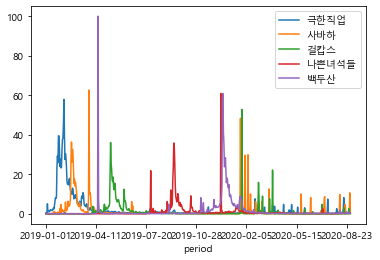

In [26]:
keywords=[
['극한직업'],
['사바하'],
['걸캅스'],
['나쁜녀석들'],
['백두산'],
#['기생충','봉준호','짜파구리'],
]
mdf=MyDataLab(keywords,'2019-01-01','2020-08-30','date')
print(mdf.head())
mdf.plot()
plt.show()